In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
import nltk

In [2]:
imdbreviews=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [3]:
# Long Short Term Memory Network (LSTM) Model - Recurrent Neural Network Model
# Multiple gates will be there in a single LSTM Cell that process data
# Forget Gate - decides whether feature should be retained for next LSTM cell or ignore
# Input Gate - adds new information for the LSTM Cell
# Candidate Cell State updates information from input gate
# Cell State updates from both input and forget gate
# Output Gate updates the hidden state
# Hidden state is carry forward to next time step

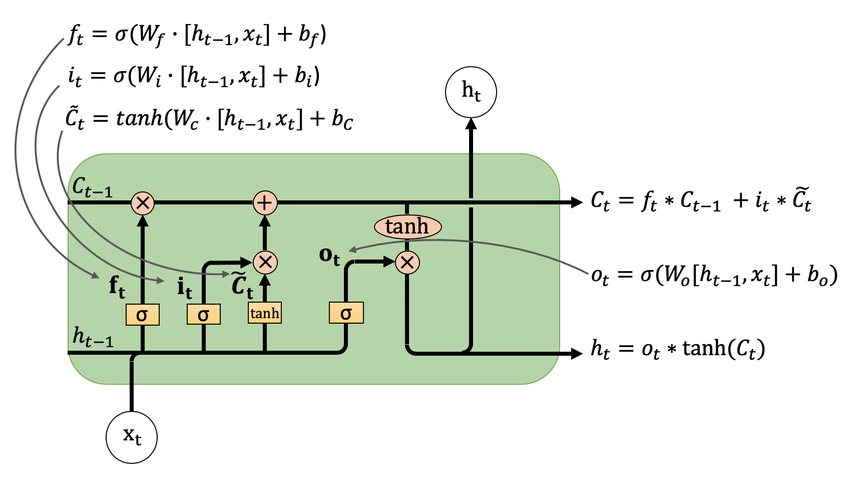

In [4]:
# Convert to lower case
imdbreviews.review=imdbreviews.review.str.lower()

In [5]:
# replace "<br" with space
imdbreviews.review=imdbreviews.review.str.replace("<br /><br />",'',regex=True)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
DTM=CountVectorizer(max_features=500,stop_words='english',ngram_range=(2,2))

In [8]:
X_DTM=DTM.fit_transform(imdbreviews.review) # For Machine Learning

In [9]:
# For Deep Learning Tokenizer must be used
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
max_nb_words=5000 # maximum number of words
max_sequence_length=50 # max number of words per review
embedding_dim=50 # embedding dimension

In [11]:
tokenizer=Tokenizer(num_words=max_nb_words)

In [12]:
tokenizer.fit_on_texts(imdbreviews.review)

In [13]:
X=tokenizer.texts_to_sequences(imdbreviews.review)

In [14]:
from keras.preprocessing.sequence import pad_sequences

In [15]:
X=pad_sequences(X,maxlen=max_sequence_length)

In [16]:
X.shape

(50000, 50)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D

In [18]:
y=pd.get_dummies(imdbreviews.sentiment).values

In [19]:
model=Sequential()
model.add(Embedding(max_nb_words,embedding_dim,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.20))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X,y,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 105ms/step - accuracy: 0.7428 - loss: 0.5038
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 108ms/step - accuracy: 0.8443 - loss: 0.3608
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 108ms/step - accuracy: 0.8605 - loss: 0.3246
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.8746 - loss: 0.2918
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 106ms/step - accuracy: 0.8868 - loss: 0.2708


In [21]:
testreview=["I have seen all the mad Max films and I was there at the very beginning with one and two... number two, at the time was a tour de force of action filmmaking and I remember it with a great fondness and watched it over again, many times."]

In [22]:
testreview=tokenizer.texts_to_sequences(testreview)
testreview=pad_sequences(testreview,maxlen=max_sequence_length)

In [23]:
sentiment=model.predict(testreview,batch_size=1,verbose=2)[0]

1/1 - 1s - 681ms/step


In [24]:
print("Tokens:",testreview)
print("Sentiment:",sentiment) # Negative Sentiment

Tokens: [[   0    0    0    0    9   24  106   28    1 1120 2024  103    2    9
    12   45   29    1   51  451   15   26    2  104  626  104   29    1
    54   12    3 2906  904 1101    4  204    2    9  382    8   15    3
    77    2  286    8  120  172  105  208]]
Sentiment: [0.03550881 0.9644912 ]
